<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Bayesian_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##It pays to go Bayes!##
- First, since the parameters have distributions, the Bayesian approach can naturally handle uncertainty. If a distribution of a parameter describes many different values as equally likely, for instance, the uncertainty is large. 
- Second, since probability is defined as a degree of belief, it's easy to include expert opinion or domain knowledge in a Bayesian model in a statistically sound way. 
- There are many other reasons to go Bayes as well: Bayesian inference does not rely on fixed constants such as p-values, a common critique on the classical approach. 
- Bayesian inference is statistically correct even with little data, and finally, 
- it often coincides with the frequentist results, but offers more flexibility to build custom models.

Below notebook follows this blog from Aerin Kim: [Bayesian Inference Intuition and Example](https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6)

##Example:##
I have about 2,000 readers per day visiting my Medium blog. Some people clap after reading articles and some don’t. I’d like to make predictions about what percentage of people will engage and clap when I write a new blog post in the future.

This kind of problem is widely applicable. Try to apply this to your own modeling work — the Click-Through Rate of an advertisement, the conversion rate of customers actually purchasing on your website, the percentage of people who would agree to go on a date with you, the survival chance for women with breast cancer, etc.

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.set_printoptions(threshold=100)
# Generating 2,000 readers' reponse. 
# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick the success rate of 30%.
clap_prob = 0.3
# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

Bayesian Inference has three steps.

Step 1. [Prior] Choose a PDF to model your parameter θ, aka the prior distribution P(θ). This is your best guess about parameters before seeing the data X.

Step 2. [Likelihood] Choose a PDF for P(X|θ). Basically you are modeling how the data X will look like given the parameter θ.

Step 3. [Posterior] Calculate the posterior distribution P(θ|X) and pick the θ that has the highest P(θ|X).

And the posterior becomes the new prior. Repeat step 3 as you get more data.

### Step 1. Prior P(θ)

What does the parameter θ represent?

The clapping 👏 probability.

Then, what kind of probability distributions should we use to model a probability?

To represent a probability, there are a few conditions to meet. First, the domain should be ranged from 0 to 1. Second, it should be a continuous distribution.

Then there are two well-known probability distributions that I can think of:

Beta and Dirichlet.

Dirichlet is for multivariate and Beta is for univariate. We have only one thing to predict, which is a probability, so let’s use the Beta distribution.

To use a Beta distribution, there are two parameters, α & β, that we need to decide. You can think of α as How many people clap (the number of successes) and β as how many people don’t clap (the number of failures). These parameters — how big or small α & β are — will determine the shape of the distribution.

In [ ]:
a = 400
b = 2000 - a
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

Let’s plot the prior distribution with respect to all θ values.

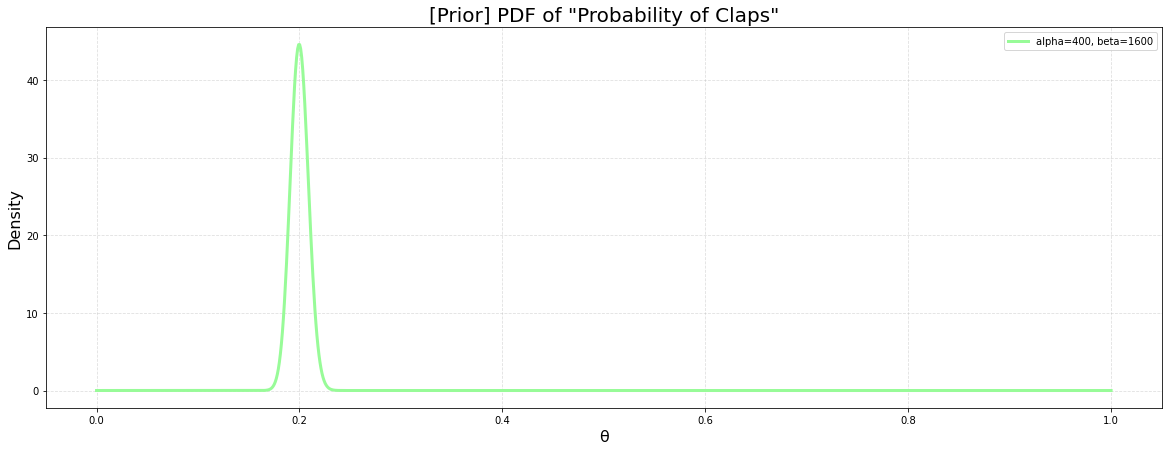

In [7]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen', label=f'alpha={a}, beta={b}')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
plt.legend()
# Show the plot
plt.show()

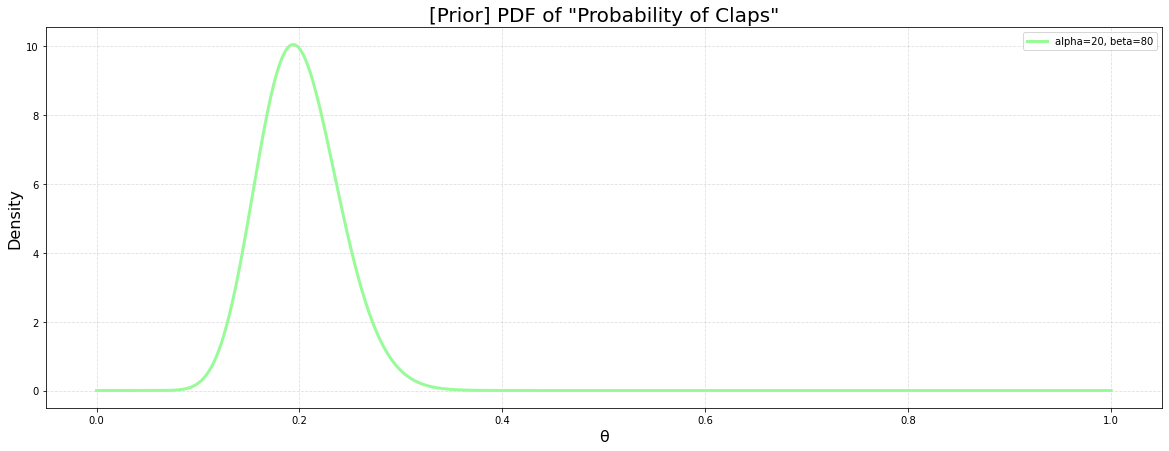

In [7]:
a = 20
b = 80
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen', label=f'alpha={a}, beta={b}')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
plt.legend()
# Show the plot
plt.show()

When sample size is small, the bell is much wider.

### Step 2. Likelihood P(X|θ)

Choose a probability model for P(X|θ), the probability of seeing the data X given a particular parameter θ. Likelihood is also called a sampling distribution. To me, the term “sampling distribution” is much more intuitive than “likelihood”.

To choose which probability distribution to use to model the sampling distribution, we need to first ask:

What does our data X look like?

X is a binary array [0,1,0,1,...,0,0,0,1].

We also have the total number of visitors (n) and we want the probability of clap (p).

Ok, n & p… What do they scream to you?

Binomial distribution with n & p.

In [4]:
a=400
b=2000-a

# The sampling dist P(X|θ) with a prior θ
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = a/(a+b))

Is our prior assumption θ highly likely?

In [5]:
likelihood

6.655607187067313e-27

Nope.

Let’s see the graph of P(X|θ) for all possible θ.

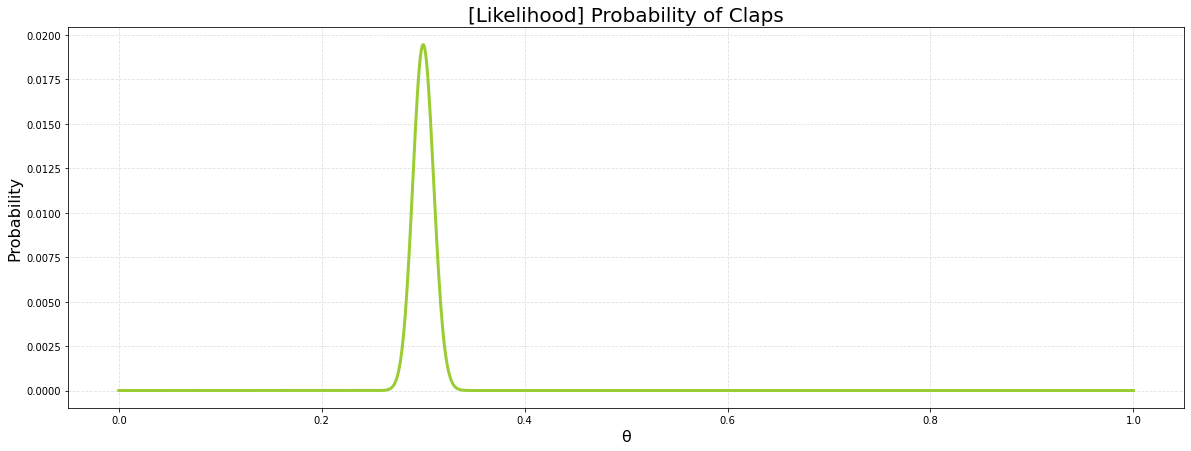

In [8]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)
# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

Step 3. Posterior. P(θ|X)

Finally, let’s answer the question we asked in the beginning:

Specifically, we will have a large number of data points X. How do we multiply the probability wrt X with the probability wrt θ?

Even though there are thousands of data points, we can convert them into a single scalar — the likelihood P(X|θ) — by plugging data into the model that you chose (in this example, the binomial distribution.)

Then, we calculate P(θ) & P(X|θ) for a specific θ and multiply them together. If you do this for every possible θ, you can pick the highest P(θ) * P(X|θ) among different θ’s.

Your initial guess about parameters was P(θ). Now you are upgrading a simple P(θ) into something more informative — P(θ|X) — as more data become available.
P(θ|X) is still the probability of θ, just like P(θ) is. However, P(θ|X) is a smarter version of P(θ).

In [9]:
# (cont.)
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior # element-wise multiplication
normalized_posterior = posterior / np.sum(posterior)

In [10]:
np.argmax(prior)

199

In [11]:
np.argmax(likelihood)

300

In [12]:
np.argmax(posterior)

249

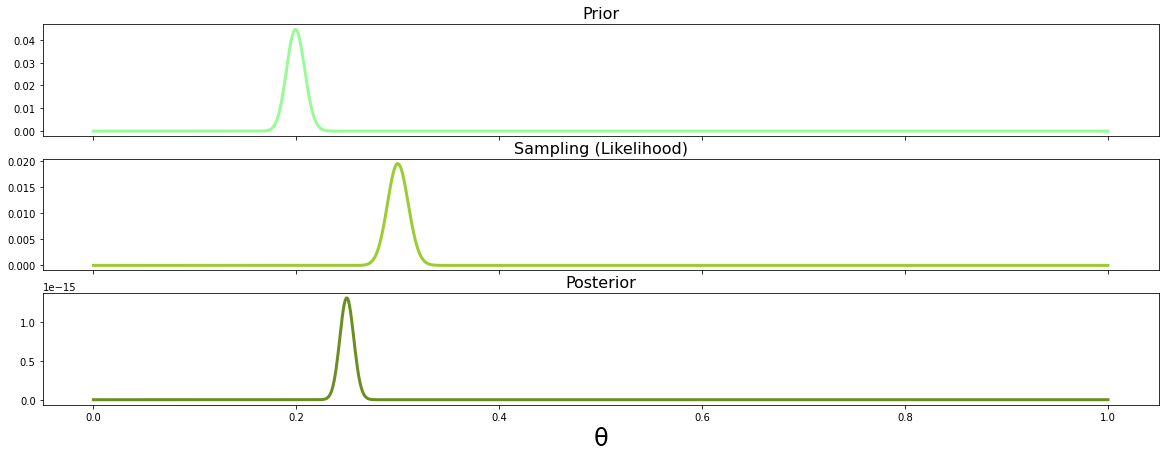

In [13]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

In [17]:
theta_range[np.argmax(prior)]

0.1991991991991992

In [18]:
theta_range[np.argmax(likelihood)]

0.3003003003003003

In [19]:
theta_range[np.argmax(posterior)]

0.24924924924924924

When you look at the posterior graph (the 3rd one), notice it is where the likelihood shifted toward the prior. The clapping probability for the prior was 20%. The clapping probability for the data was given as 30%. Now, the posterior has its peak around 25%.

Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior. Because we incorporated more information through sampling, the range of possible parameters is now narrower.

The more data you gather, the graph of the posterior will look more like that of the likelihood and less like that of the prior. In other words, as you get more data, the original prior distribution matters less.

Finally, we pick θ that gives the highest posterior computed by numerical optimization, such as the Gradient Descent or newton method. This whole iterative procedure is called Maximum A Posteriori estimation (MAP).